In [12]:
import os
os.chdir('..')

In [13]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt

import Yukawa_SINDy as ys
import cross_validation as cv

from importlib import reload
import pickle as pkl
with open('scaling_const.float', 'rb') as f:
    SCALING_CONST = pkl.load(f)

/Users/zbh0005/Library/CloudStorage/OneDrive-AuburnUniversity/Documents/Code/yukawa-sindy/Yukawa_SINDy.py:674: SyntaxWarning: invalid escape sequence '\o'
  ax.set_title("simulation duration: " + str(sim_duration) + "$\omega_{pd}$")
/Users/zbh0005/Library/CloudStorage/OneDrive-AuburnUniversity/Documents/Code/yukawa-sindy/Yukawa_SINDy.py:677: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel("max ptcl sep ($\lambda_{De}$)")
/Users/zbh0005/Library/CloudStorage/OneDrive-AuburnUniversity/Documents/Code/yukawa-sindy/Yukawa_SINDy.py:691: SyntaxWarning: invalid escape sequence '\l'
  axs[i].set_title("Cutoff: " + str(cutoffs[i]) + "$\lambda_{De}$", fontsize=14)
/Users/zbh0005/Library/CloudStorage/OneDrive-AuburnUniversity/Documents/Code/yukawa-sindy/Yukawa_SINDy.py:693: SyntaxWarning: invalid escape sequence '\o'
  fig.supxlabel('duration ($\omega_{pd}^{-1}$)')
/Users/zbh0005/Library/CloudStorage/OneDrive-AuburnUniversity/Documents/Code/yukawa-sindy/Yukawa_SINDy.py:695: SyntaxWarnin

In [26]:
reload(ys)
reload(cv)

<module 'cross_validation' from '/Users/zbh0005/Library/CloudStorage/OneDrive-AuburnUniversity/Documents/Code/yukawa-sindy/cross_validation.py'>

# Comparison of strong- and weak-form SINDy on representative cases

## Low noise

For this case, we will utilize a noise standard deviation of $1\times10^{-4}$ to demonstrate that weak-form SINDy performs essentially the same as the strong-form.

In [24]:
# generate data
noise_level = 1e-4

simulation_list = ys.generate_training_data(
    n_sims = 200,
    duration = 5,
    dt = 0.001,
    noise_level = noise_level,
    mu_x0s = 0.5,
    mu_v0s = 0.01,
    scaled = True
)

In [25]:
norm_mat = np.array([1, SCALING_CONST]).reshape(2,1).repeat(10, axis=1)
true_coefficients = np.array(
    [[0., 1., 0.,            0., 0.,            0., 0., 0., 0., 0.],
     [0., 0., SCALING_CONST, 0., SCALING_CONST, 0., 0., 0., 0., 0.]]
)

def scan_thresholds(threshold_space, simulation_list, feature_library, feature_names, true_coefficients, n_folds):
    all_best_models = []
    all_best_model_scores = []
    all_truest_models = []
    all_truest_model_scores = []
    for threshold in threshold_space:
        best_model, best_model_score, truest_model, truest_model_score = cv.cross_validate(
            simulation_list,
            threshold,
            feature_library,
            feature_names,
            true_coefficients,
            n_folds
        )
        all_best_models.append(best_model)
        all_best_model_scores.append(best_model_score)
        all_truest_models.append(truest_model)
        all_truest_model_scores.append(truest_model_score)
    return all_best_models, all_best_model_scores, all_truest_models, all_truest_model_scores

### Strong library

In [45]:
threshold_space = np.linspace(0, 0.1, 10)
feature_library = ys.generate_Yukawa_library()
feature_names = ['x', 'v']
n_folds = 10

In [28]:
# threshold analysis
model_info = scan_thresholds(threshold_space, simulation_list, feature_library, feature_names, true_coefficients, n_folds)
# unpack
all_best_models, all_best_model_scores, all_truest_models, all_truest_model_scores = model_info

/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.011111111111111112) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.022222222222222223) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.03333333333333333) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.044444444444444446) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter

Let's now check to see if the 'best' models differ from the 'truest models'.

In [29]:
np.all(all_best_models==all_truest_models)

True

In [132]:
def print_models(best_models: list, best_scores: list, truest_models: list, truest_scores: list, threshold_space):
    for idx in range(len(truest_models)):
        print('threshold:', threshold_space[idx])
        print('truest')
        truest_models[idx].print()
        print('score', truest_scores[idx])

        print('\nbest prediction')
        best_models[idx].print()
        print('score', best_scores[idx])
        print(60*'-')


In [46]:
print_models(*model_info, threshold_space)

threshold: 0.0
truest
(x)' = 1.000 v + 0.002 exp(-x) / x + -0.008 exp(-x) / x^2 + 0.007 exp(-x) / x^3 + -0.002 exp(-x) / x^4
(v)' = 4.541 exp(-x) / x + 4.554 exp(-x) / x^2 + -0.001 exp(-v) / v^2 + -0.006 exp(-x) / x^3 + 0.001 exp(-x) / x^4
score 1.3253007473591156e-05

best prediction
(x)' = 1.000 v + 0.003 exp(-x) / x + -0.008 exp(-x) / x^2 + 0.001 exp(-v) / v^2 + 0.008 exp(-x) / x^3 + -0.002 exp(-x) / x^4
(v)' = 4.543 exp(-x) / x + 4.550 exp(-x) / x^2 + -0.003 exp(-x) / x^3
score 1.3783087600982022e-05
------------------------------------------------------------
threshold: 0.011111111111111112
truest
(x)' = 1.000 v
(v)' = 4.542 exp(-x) / x + 4.550 exp(-x) / x^2 + -0.003 exp(-x) / x^3
score 1.3419082682778702e-05

best prediction
(x)' = 1.000 v
(v)' = 4.543 exp(-x) / x + 4.550 exp(-x) / x^2 + -0.002 exp(-x) / x^3
score 1.4522921230374652e-05
------------------------------------------------------------


Complete agreement between best models and truest models, so only saving the truest models.

In [185]:
# extract coefficients, save coefficients and score on withheld data
strong_model_coefs = [model.coefficients() for model in all_truest_models]
strong_thresholds = np.linspace(0, 0.1, 10)

# save coefficients and thresholds
directory_name = 'paper_results/weak_vs_strong/low_noise'
overwrite = False
ys.pickle_data(
    strong_model_coefs, 
    directory_name, 
    'strong_model_coefs.pickle',
    overwrite
)

ys.pickle_data(
    strong_thresholds,
    directory_name,
    'strong_thresholds.pickle',
    overwrite
)

ys.pickle_data(
    all_truest_model_scores,
    directory_name,
    'strong_prediction_errors.pickle',
    overwrite
)

File exists and overwrite is set to False, no file was saved.
File exists and overwrite is set to False, no file was saved.
File exists and overwrite is set to False, no file was saved.
File exists and overwrite is set to False, no file was saved.


### Weak case

Initial test to see if small nonzero threshold finds correct equation

In [121]:
threshold_space = np.arange(0., 1.2, 0.2)

In [122]:
feature_library = ys.generate_weak_Yukawa_library(
    simulation_list[0].t,
    K = 500
)
# threshold analysis
model_info = scan_thresholds(threshold_space, simulation_list, feature_library, feature_names, true_coefficients, n_folds)
# unpack
all_best_weak, all_best_scores_weak, all_truest_weak, all_truest_scores_weak = model_info

/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.4) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.6000000000000001) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.8) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (1.0) and eliminated all coefficients
  

In [187]:
# save models as coefficients
all_best_weak_coefficients = [model.coefficients() for model in all_best_weak]
all_truest_weak_coefficients = [model.coefficients() for model in all_truest_weak]
weak_thresholds = np.arange(0., 1.2, 0.2)

ys.pickle_data(
    all_best_weak_coefficients,
    directory_name,
    'best_weak_coefs.pickle',
    overwrite
)

ys.pickle_data(
    all_best_scores_weak,
    directory_name,
    'best_weak_prediction_errors.pickle',
    overwrite
)

ys.pickle_data(
    all_truest_weak_coefficients,
    directory_name,
    'truest_weak_coefs.pickle',
    overwrite
)

ys.pickle_data(
    all_truest_scores_weak,
    directory_name,
    'truest_weak_prediction_errors.pickle',
    overwrite
)

ys.pickle_data(
    weak_thresholds,
    directory_name,
    'weak_thresholds.pickle',
    overwrite
)

File exists and overwrite is set to False, no file was saved.
File exists and overwrite is set to False, no file was saved.
File exists and overwrite is set to False, no file was saved.
File exists and overwrite is set to False, no file was saved.
File exists and overwrite is set to False, no file was saved.


In [123]:
np.all(all_best_weak==all_truest_weak)

False

This time, models are not all the same.

In [133]:
print_models(*model_info, threshold_space)

threshold: 0.0
truest
(x)' = 1.000 v + 0.003 exp(-x) / x + -0.001 exp(-v) / v + -0.008 exp(-x) / x^2 + 0.003 exp(-v) / v^2 + 0.007 exp(-x) / x^3 + -0.002 exp(-v) / v^3 + -0.002 exp(-x) / x^4
(v)' = 4.543 exp(-x) / x + 4.548 exp(-x) / x^2 + 0.001 exp(-x) / x^3 + -0.002 exp(-x) / x^4
score 1.3912715910607253e-05

best prediction
(x)' = 1.000 v + 0.003 exp(-x) / x + -0.009 exp(-x) / x^2 + 0.008 exp(-x) / x^3 + -0.002 exp(-x) / x^4
(v)' = 4.540 exp(-x) / x + 0.001 exp(-v) / v + 4.556 exp(-x) / x^2 + -0.001 exp(-v) / v^2 + -0.007 exp(-x) / x^3 + 0.001 exp(-v) / v^3 + 0.001 exp(-x) / x^4
score 1.3328210587844704e-05
------------------------------------------------------------
threshold: 0.2
truest
(x)' = 1.000 v
(v)' = 4.543 exp(-x) / x + 4.548 exp(-x) / x^2 + -0.001 exp(-x) / x^3
score 1.396300188096954e-05

best prediction
(x)' = 1.000 v
(v)' = 4.541 exp(-x) / x + 4.554 exp(-x) / x^2 + -0.007 exp(-x) / x^3 + 0.001 exp(-x) / x^4
score 1.331744039114348e-05
----------------------------------

In [165]:
def plot_dev_vs_thresh(best_models, truest_models, threshold_space):

    # compute absolute difference between coefficients
    coef_dev_best = np.array([cv.absolute_difference(true_coefficients, model.coefficients()) for model in best_models])
    coef_dev_truest = np.array([cv.absolute_difference(true_coefficients, model.coefficients()) for model in truest_models])
    coef_devs = [coef_dev_best, coef_dev_truest]

    best_model_complexities = np.array([np.count_nonzero(model.coefficients()) for model in best_models])
    truest_model_complexities = np.array([np.count_nonzero(model.coefficients()) for model in truest_models])
    complexities = [best_model_complexities, truest_model_complexities]

    titles = ["Lowest pred. error", "Lowest coef. dev."]

    n_rows = 1
    n_cols = 2
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10,5), sharey=True)
    for col in range(n_cols):
        ax = axs[col]
        x = threshold_space
        y = coef_devs[col]
        n = complexities[col]
        ax.scatter(x, y)#, c=n)
        ax.set_title(titles[col])

        pad = 0.0003
        for i, txt in enumerate(n):
            ax.annotate(txt, (x[i], y[i]), (x[i], y[i]+pad), fontsize=10)

    fig.supxlabel("Threshold")
    fig.supylabel("Deviation from true")
    fig.tight_layout()

    return fig, axs

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Lowest pred. error'}>,
        <Axes: title={'center': 'Lowest coef. dev.'}>], dtype=object))

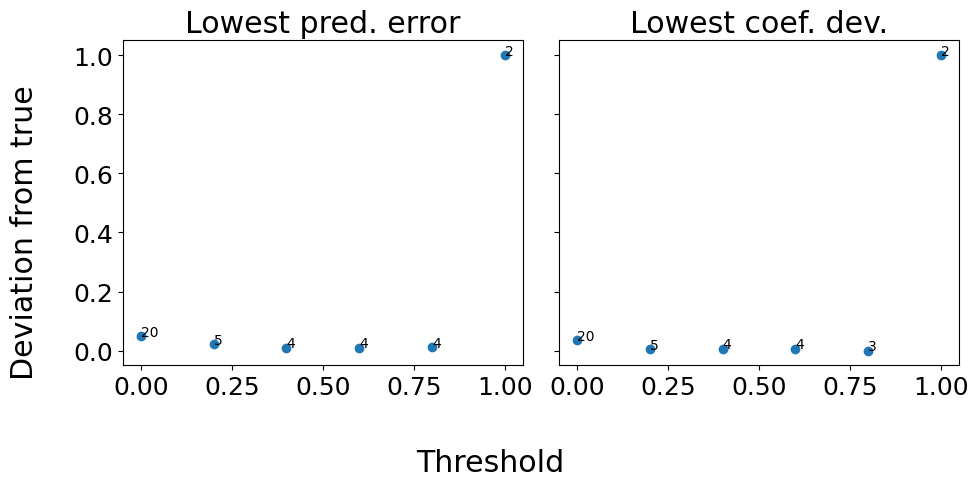

In [182]:
plot_dev_vs_thresh(all_best_weak, all_truest_weak, np.arange(0., 1.2, 0.2))

## High noise case

### Strong library

In [189]:
# generate data
noise_level = 1e-1

simulation_list = ys.generate_training_data(
    n_sims = 200,
    duration = 5,
    dt = 0.001,
    noise_level = noise_level,
    mu_x0s = 0.5,
    mu_v0s = 0.01,
    scaled = True
)

In [190]:
threshold_space = np.linspace(0., 0.1, 11)
feature_library = ys.generate_Yukawa_library()
feature_names = ['x', 'v']
n_folds = 10

In [191]:
# threshold analysis
model_info = scan_thresholds(threshold_space, simulation_list, feature_library, feature_names, true_coefficients, n_folds)
# unpack
all_best_models, all_best_model_scores, all_truest_models, all_truest_model_scores = model_info

/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.02) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.03) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.04) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.05) and eliminated all coefficients
  warnings.w

In [193]:
directory_name

'paper_results/weak_vs_strong/low_noise'

In [194]:
# save data
best_strong_coefficients = [model.coefficients() for model in all_best_models]
truest_strong_coefficients = [model.coefficients() for model in all_truest_models]
strong_thresholds_high = np.linspace(0., 0.1, 11)

directory_name = 'paper_results/weak_vs_strong/high_noise'

ys.pickle_data(
    best_strong_coefficients,
    directory_name,
    'best_strong_coefs.pickle',
    overwrite
)

ys.pickle_data(
    all_best_model_scores,
    directory_name,
    'best_strong_prediction_errors.pickle',
    overwrite
)

ys.pickle_data(
    truest_strong_coefficients,
    directory_name,
    'truest_strong_coefs.pickle',
    overwrite
)

ys.pickle_data(
    all_truest_model_scores,
    directory_name,
    'truest_strong_prediction_errors.pickle',
    overwrite
)

ys.pickle_data(
    strong_thresholds_high,
    directory_name,
    'strong_thresholds.pickle'
)

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Lowest pred. error'}>,
        <Axes: title={'center': 'Lowest coef. dev.'}>], dtype=object))

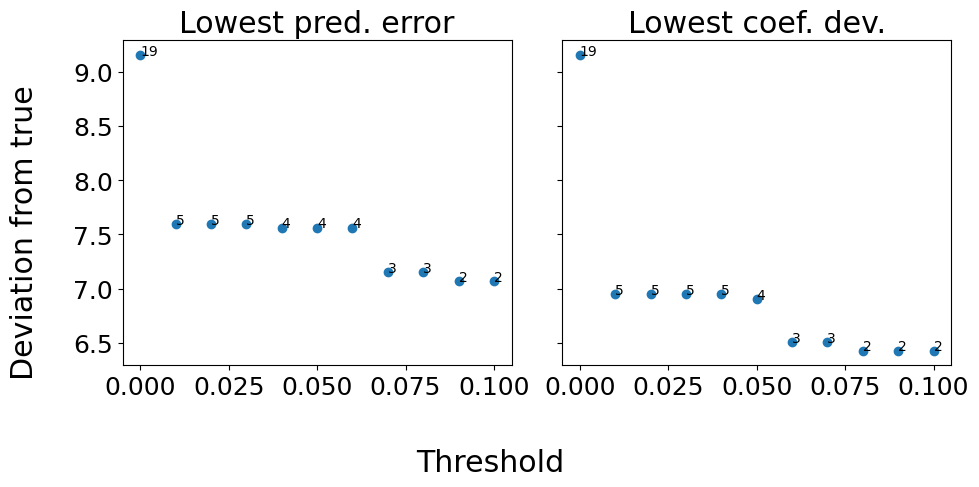

In [192]:
plot_dev_vs_thresh(all_best_models, all_truest_models, threshold_space)

In [173]:
print_models(*model_info, threshold_space)

threshold: 0.0
truest
(x)' = 0.002 x + 0.987 v + 0.025 exp(-x) / x + 0.022 exp(-v) / v
(v)' = 0.000
score 71.39517294911607

best prediction
(x)' = 0.002 x + 0.987 v + 0.025 exp(-x) / x + 0.022 exp(-v) / v
(v)' = 0.000
score 71.39517294911607
------------------------------------------------------------
threshold: 0.01
truest
(x)' = 0.994 v + -0.044 exp(-x) / x
(v)' = -0.108 x + 0.355 v + 2.656 exp(-x) / x
score 71.38686754156882

best prediction
(x)' = 0.994 v + -0.037 exp(-x) / x
(v)' = -0.113 x + 0.370 v + 2.016 exp(-x) / x
score 71.38515181951968
------------------------------------------------------------
threshold: 0.02
truest
(x)' = 0.994 v + -0.044 exp(-x) / x
(v)' = -0.108 x + 0.355 v + 2.656 exp(-x) / x
score 71.38686754156882

best prediction
(x)' = 0.994 v + -0.037 exp(-x) / x
(v)' = -0.113 x + 0.370 v + 2.016 exp(-x) / x
score 71.38515181951968
------------------------------------------------------------
threshold: 0.03
truest
(x)' = 0.994 v + -0.044 exp(-x) / x
(v)' = -0.1

### Weak library

In [201]:
feature_library = ys.generate_weak_Yukawa_library(
    simulation_list[0].t,
    K = 500
)
threshold_space = np.arange(0., 1.2, 0.2)

In [179]:
# threshold analysis
model_info_high = scan_thresholds(threshold_space, simulation_list, feature_library, feature_names, true_coefficients, n_folds)
# unpack
all_best_weak_high, all_best_scores_weak_high, all_truest_weak_high, all_truest_scores_weak_high = model_info_high

/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.2) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.4) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.6000000000000001) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.8) and eliminated all coefficients
  warnings.warn(
/opt/anaconda3/envs/yukawa-sindy-vetted/lib/python3.12/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (1.0) and eliminated all coefficients
  

In [195]:
directory_name

'paper_results/weak_vs_strong/high_noise'

In [196]:
# save
all_best_weak_high_coefficients = [model.coefficients() for model in all_best_weak_high]
all_truest_weak_high_coefficients = [model.coefficients() for model in all_truest_weak_high]
weak_high_thresholds = np.arange(0., 1.2, 0.2)

ys.pickle_data(
    all_best_weak_high_coefficients,
    directory_name,
    'best_weak_coefs.pickle',
    overwrite
)

ys.pickle_data(
    all_best_scores_weak_high,
    directory_name,
    'best_weak_prediction_errors.pickle',
    overwrite
)

ys.pickle_data(
    all_truest_weak_high_coefficients,
    directory_name,
    'truest_weak_coefs.pickle',
    overwrite
)

ys.pickle_data(
    all_truest_scores_weak_high,
    directory_name,
    'truest_weak_prediction_errors.pickle',
    overwrite
)

ys.pickle_data(
    weak_high_thresholds,
    directory_name,
    'weak_thresholds.pickle'
)

In [202]:
print(len(all_best_weak_high))
print(len(all_truest_weak_high))
print(len(threshold_space))

6
6
6


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Lowest pred. error'}>,
        <Axes: title={'center': 'Lowest coef. dev.'}>], dtype=object))

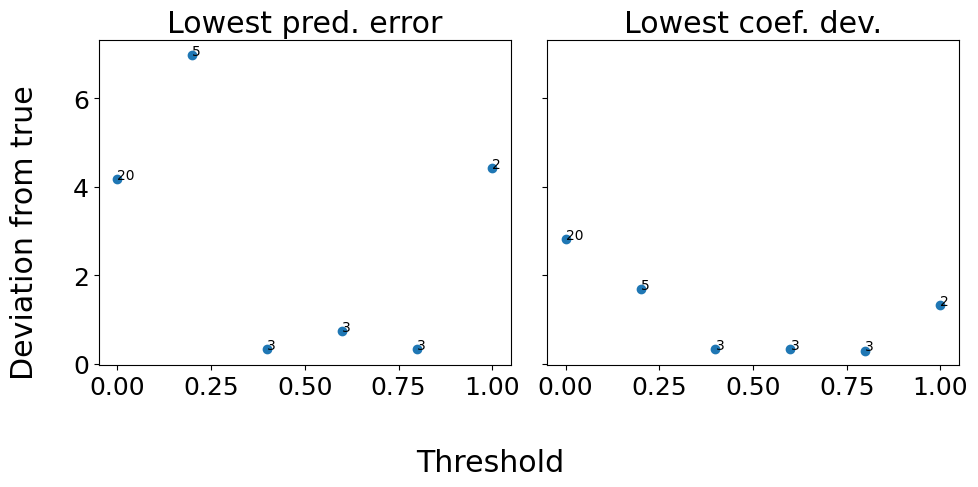

In [203]:
plot_dev_vs_thresh(all_best_weak_high, all_truest_weak_high, threshold_space)

In [204]:
print_models(*model_info_high, threshold_space)

threshold: 0.0
truest
(x)' = 1.000 v + -0.217 exp(-x) / x + -0.019 exp(-v) / v + -0.077 exp(-x) / x^2 + 0.040 exp(-v) / v^2 + 0.168 exp(-x) / x^3
(v)' = -0.001 v + 5.066 exp(-x) / x + -0.117 exp(-v) / v + 3.314 exp(-x) / x^2 + 0.080 exp(-v) / v^2 + 0.333 exp(-x) / x^3
score 0.014192859986217925

best prediction
(x)' = -0.001 x + 1.002 v + -0.344 exp(-x) / x + 0.123 exp(-v) / v + -0.061 exp(-x) / x^2 + -0.013 exp(-v) / v^2 + 0.188 exp(-x) / x^3 + 0.034 exp(-x) / x^4
(v)' = 0.001 x + -0.002 v + 5.009 exp(-x) / x + 0.009 exp(-v) / v + 2.841 exp(-x) / x^2 + 0.037 exp(-v) / v^2 + 1.028 exp(-x) / x^3 + -0.158 exp(-x) / x^4
score 0.014015982994753196
------------------------------------------------------------
threshold: 0.2
truest
(x)' = 0.999 v + -0.466 exp(-x) / x + 0.339 exp(-x) / x^2
(v)' = 4.825 exp(-x) / x + 3.945 exp(-x) / x^2
score 0.01428666356518721

best prediction
(x)' = 1.000 v
(v)' = 2.527 exp(-x) / x + 7.981 exp(-x) / x^2 + -1.157 exp(-x) / x^3 + -0.363 exp(-x) / x^4
score 0.0

## Higher noise??